In [2]:
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import pandas as pd
import re

In [3]:
def read_rewards(filename):
    rewards = []
    with open(filename, "r") as f:
        line = f.readline()
        while line:
            rew = float(line.split()[-1])
            rewards.append(rew)
            line = f.readline()
    return np.array(rewards)

def read_multi_rewards(filename, run, episodes):
    rewards = []
    for r in range(run):
        reward = read_rewards(filename+"_run"+str(r)+".txt")
        rewards.append(reward[:episodes])
    return np.array(rewards)

In [4]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return np.array(smoothed)

In [74]:
runs = 10
episodes = 200
auxiliary = read_multi_rewards("data/cartpole_pixel/single_detach", runs, episodes)
single = read_multi_rewards("data/cartpole_pixel/single_noreg_detach", runs, episodes)
transfer = read_multi_rewards("data/cartpole_pixel/transfer_detach_c1", runs, episodes)

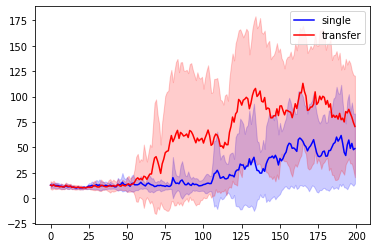

In [77]:
sm = 0.6
single_mean, single_std = smooth(single.mean(0), sm), smooth(single.std(0), sm)
transfer_mean, transfer_std = smooth(transfer.mean(0), sm), smooth(transfer.std(0), sm)
auxiliary_mean, auxiliary_std = smooth(auxiliary.mean(0), sm), smooth(auxiliary.std(0), sm)
n = len(single_mean)
xs = list(range(n))
plt.plot(xs, single_mean, color='b', label="single")
plt.fill_between(xs, single_mean-single_std, single_mean+single_std, color='b', alpha=0.2)
# plt.plot(xs, auxiliary_mean, color='g', label="auxiliary")
# plt.fill_between(xs, auxiliary_mean-auxiliary_std, auxiliary_mean+auxiliary_std, color='b', alpha=0.2)
plt.plot(xs, transfer_mean, color='r', label="transfer")
plt.fill_between(xs, transfer_mean-transfer_std, transfer_mean+transfer_std, color='r', alpha=0.2)
plt.legend()

plt.legend()
plt.show()
# plt.savefig("plots/cart_pixel.png", format="png")

In [66]:
auxiliary = read_multi_rewards("data/cartpole/source_detach", 1, 200)
single = read_multi_rewards("data/cartpole/source_noreg_detach", 1, 200)
transfer = read_multi_rewards("data/cartpole/source_transfer_detach_c1", 1, 200)
transfer2 = read_multi_rewards("data/cartpole/source_transfer_fromnoreg_detach_c1", 1, 200)

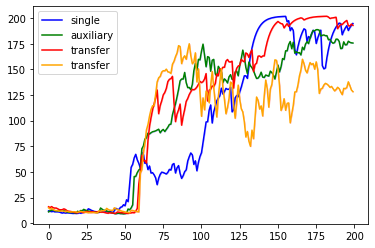

In [67]:
sm = 0.8
single_mean, single_std = smooth(single.mean(0), sm), smooth(single.std(0), sm)
transfer_mean, transfer_std = smooth(transfer.mean(0), sm), smooth(transfer.std(0), sm)
transfer2_mean, transfer2_std = smooth(transfer2.mean(0), sm), smooth(transfer2.std(0), sm)
auxiliary_mean, auxiliary_std = smooth(auxiliary.mean(0), sm), smooth(auxiliary.std(0), sm)
n = len(single_mean)
xs = list(range(n))

plt.plot(xs, single_mean, color='b', label="single")
plt.fill_between(xs, single_mean-single_std, single_mean+single_std, color='b', alpha=0.2)
plt.plot(xs, auxiliary_mean, color='g', label="auxiliary")
plt.fill_between(xs, auxiliary_mean-auxiliary_std, auxiliary_mean+auxiliary_std, color='b', alpha=0.2)
plt.plot(xs, transfer_mean, color='r', label="transfer")
plt.fill_between(xs, transfer_mean-transfer_std, transfer_mean+transfer_std, color='r', alpha=0.2)
plt.plot(xs, transfer2_mean, color='orange', label="transfer")
plt.fill_between(xs, transfer2_mean-transfer2_std, transfer2_mean+transfer2_std, color='r', alpha=0.2)
plt.legend()
plt.show()
# plt.savefig("plots/compare.png", format="png")

In [79]:
def plotting(runs, episodes, envname, name, sm=0.6, source=False):
    if source:
        auxiliary = read_multi_rewards("data/{}/source{}".format(envname, name), runs, episodes)
        single = read_multi_rewards("data/{}/source_noreg{}".format(envname, name), runs, episodes)
        transfer = read_multi_rewards("data/{}/source_transfer{}_c1".format(envname, name), runs, episodes)
    else:
        auxiliary = read_multi_rewards("data/{}/single{}".format(envname, name), runs, episodes)
        single = read_multi_rewards("data/{}/single_noreg{}".format(envname, name), runs, episodes)
        transfer = read_multi_rewards("data/{}/transfer{}_c1".format(envname, name), runs, episodes)
    single_mean, single_std = smooth(single.mean(0), sm), smooth(single.std(0), sm)
    transfer_mean, transfer_std = smooth(transfer.mean(0), sm), smooth(transfer.std(0), sm)
    auxiliary_mean, auxiliary_std = smooth(auxiliary.mean(0), sm), smooth(auxiliary.std(0), sm)
    n = len(single_mean)
    xs = list(range(n))

    plt.plot(xs, single_mean, color='b', label="single")
    plt.fill_between(xs, single_mean-single_std, single_mean+single_std, color='b', alpha=0.2)
    plt.plot(xs, auxiliary_mean, color='g', label="auxiliary")
    plt.fill_between(xs, auxiliary_mean-auxiliary_std, auxiliary_mean+auxiliary_std, color='b', alpha=0.2)
    plt.plot(xs, transfer_mean, color='r', label="transfer")
    plt.fill_between(xs, transfer_mean-transfer_std, transfer_mean+transfer_std, color='r', alpha=0.2)
    plt.legend()
    plt.show()

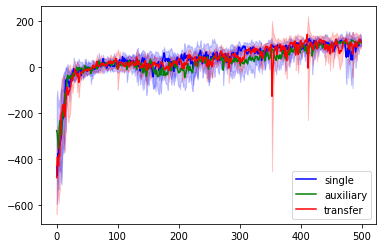

In [80]:
plotting(3, 500, "lunarlander", "", source=True)

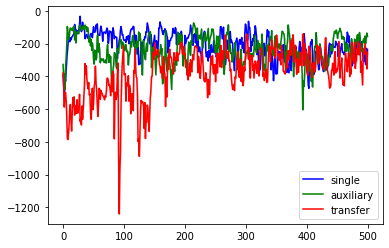

In [81]:
plotting(1, 500, "lunarlander_pixel", "")